# Descriptive statistics

In this notebook we'll see how to calculate numerical and graphical summaries of different types of data. Open the [chapter preview](https://minireference.com/static/excerpts/noBSstats/descriptive_statistics.pdf) in another tab, and follow along with the hands on calculations based on `pandas` and `seaborn`.

In [ ]:
import pandas as pd
import seaborn as sns


In [1]:
#@title Load CSV data
import io
data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")

In [ ]:
grades_data = pd.read_csv(data_file, index_col="student_ID")
grades_data

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1
6,business,debate,10.80,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57.0


In [ ]:
# rows
grades_data.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64', name='student_ID')

In [ ]:
# columns
grades_data.columns

Index(['background', 'curriculum', 'effort', 'score'], dtype='object')

# Describing numeric data

Let'look at the scrore variable.

In [ ]:
scores = grades_data['score']
scores.describe()

count    15.000000
mean     72.580000
std       9.979279
min      57.000000
25%      68.000000
50%      72.700000
75%      75.750000
max      96.200000
Name: score, dtype: float64

In [ ]:
scores.median()

72.7

In [ ]:
scores.max()

96.2

In [ ]:
scores.mean()

72.58

In [ ]:
scores.var() # variance 1/n EE(x-mean)^2

99.58600000000001

In [ ]:
 scores.var(ddof=0)  # bias-corrected variance,  1/(n-1) EE(x-mean)^2

92.94693333333335

In [ ]:
scores.std()

9.979278531036199

In [ ]:
scores.value_counts(bins=[50,60,70,80,90,100]).sort_index()

(49.999, 60.0]    2
(60.0, 70.0]      3
(70.0, 80.0]      8
(80.0, 90.0]      1
(90.0, 100.0]     1
Name: score, dtype: int64

In [ ]:
# note mode is the bin 70--80, which contains 8 values

In [ ]:
# scores.hist()

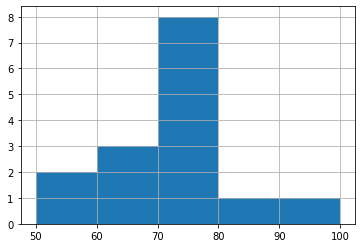

In [ ]:
scores.hist(bins=[50,60,70,80,90,100])

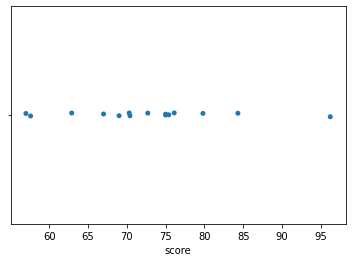

In [ ]:
sns.stripplot(x=scores, jitter=0.01)

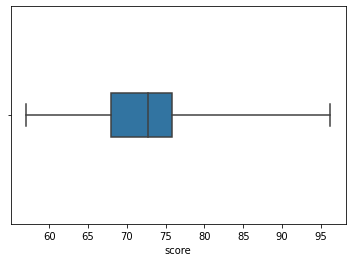

In [ ]:
sns.boxplot(x=scores, width=0.2, whis=10)

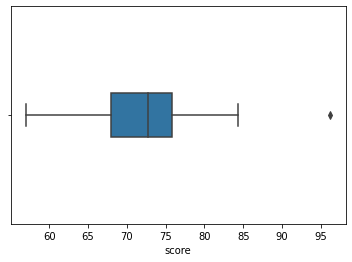

In [ ]:
sns.boxplot(x=scores, width=0.2)

In [ ]:
scores.quantile(0.25)  # Q1

68.0

In [ ]:
scores.quantile(0.5)  # Q2 = median

72.7

In [ ]:
scores.quantile(0.75)  # Q3

75.75

In [ ]:
IQR = scores.quantile(0.75) - scores.quantile(0.25)
IQR

7.75

# Categorical data

In [ ]:
bg = grades_data['background']
bg

student_ID
1         arts
2      science
3         arts
4         arts
5      science
6     business
7      science
8     business
9     business
10     science
11    business
12        arts
13     science
14     science
15        arts
Name: background, dtype: object

In [ ]:
# frequencies
bg.value_counts()

science     6
arts        5
business    4
Name: background, dtype: int64

In [ ]:
# relative frequencies
bg.value_counts() / len(bg)

science     0.400000
arts        0.333333
business    0.266667
Name: background, dtype: float64

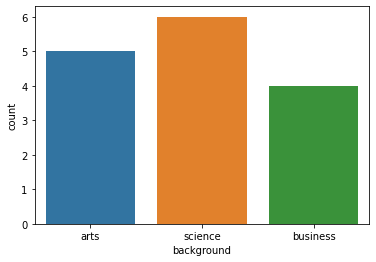

In [ ]:
# bar chart of counts
sns.countplot(x=bg)

In [ ]:
sns.barplot?

# Comparing two numeric variables


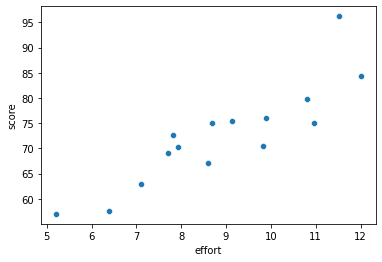

In [ ]:

sns.scatterplot(x="effort", y="score", data=grades_data)

In [ ]:
grades_data.cov()

,effort,score
effort,3.795312,17.097314
score,17.097314,99.586000


In [ ]:
grades_data.cov()['effort']['score']   # note: this uses 1/n-1

17.097314285714287

In [ ]:
grades_data.corr()['effort']['score']  # note: this uses 1/n-1

0.8794375135614694

# Comparing two categorical variables

In [ ]:
# sns.countplot(x="background",  y="curriculum", data=grades_data)